<center><img src="tinder-app.avif" width="1194" height="619"></center>

Tinder est une application de rencontres en ligne et de réseautage géosocial. Dans Tinder, les utilisateurs « glissent vers la droite » pour aimer ou « glissent vers la gauche » pour ne pas aimer les profils des autres utilisateurs, qui incluent leurs photos, une courte biographie et une liste de leurs intérêts.  

En 2021, Tinder a enregistré plus de 65 milliards de matchs dans le monde.
***

# <center><font color="tomato"><ins>**PROJET**</ins></font></center>  

L’équipe marketing a besoin d’aide sur un nouveau projet.  
> ***Ils constatent une diminution du nombre de correspondances et ils essaient de trouver un moyen de comprendre ce qui fait que les gens s’intéressent les uns aux autres***.  

Ils ont décidé de mener une expérience de speed dating avec des personnes qui devaient donner à Tinder beaucoup d’informations sur elles-mêmes qui pourraient finalement se refléter sur leur profil de rencontre sur l’application.  

Tinder a ensuite recueilli les données de cette expérience. Chaque ligne de l’ensemble de données représente un rendez-vous rapide entre deux personnes et indique si chacune d’entre elles a secrètement accepté d’aller à un deuxième rendez-vous avec l’autre personne.  
***

<center><img src="Illustration.png" width="1194" height="619"></center>

#### <font color="VIOLET"><ins>Import</font>

In [357]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## <center><font color="tomato"><ins>**1 - ETUDE DES DONNEES FOURNIES**</ins></font></center>  

#### <font color="VIOLET"><ins>Récupération des données dans un dataframe</font>

In [358]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding="cp1252")

In [359]:
df.shape

(8378, 195)

Nous avons un dataset de 8378 lignes et 195 colonnes.

In [360]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [361]:
df['iid'].max()

552

Nous avons 552 personnes qui ont répondu à notre questionnaire.

In [362]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

Le nom des colonnes sont peu explicites, la documentation fournie nous sera d'une grande aide.

In [363]:
len(df.iid)

8378

Nous avons au total 8378 speed_dating

In [364]:
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

Nous avons beaucoup de valeurs manquantes dans notre jeu de données. Ce qui semble logique, car tous les participants n'ont pas obtenu de second rendez-vous. Les autres valeurs manquantes seront supprimées car font partie d'informations sur les participants.

## <center><font color="tomato"><ins>**2 - ETUDE DU PROFIL DES UTILISATEURS**</ins></font></center> 

#### <font color="VIOLET"><ins>Profil physique</font>

##### <font color="#3FFF33">Répartition hommes / femmes</font>

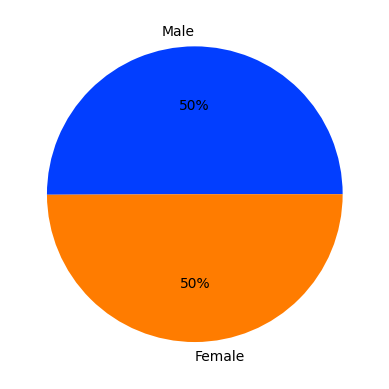

In [365]:
gender = df.gender.value_counts()
gender.rename(index={0:'Female', 1:'Male'}, inplace=True)
colors = sns.color_palette("bright")
plt.pie(gender, labels=gender.index, colors=colors, autopct="%0.0f%%")
plt.show()

##### <font color="#3FFF33">Age des participants</font>

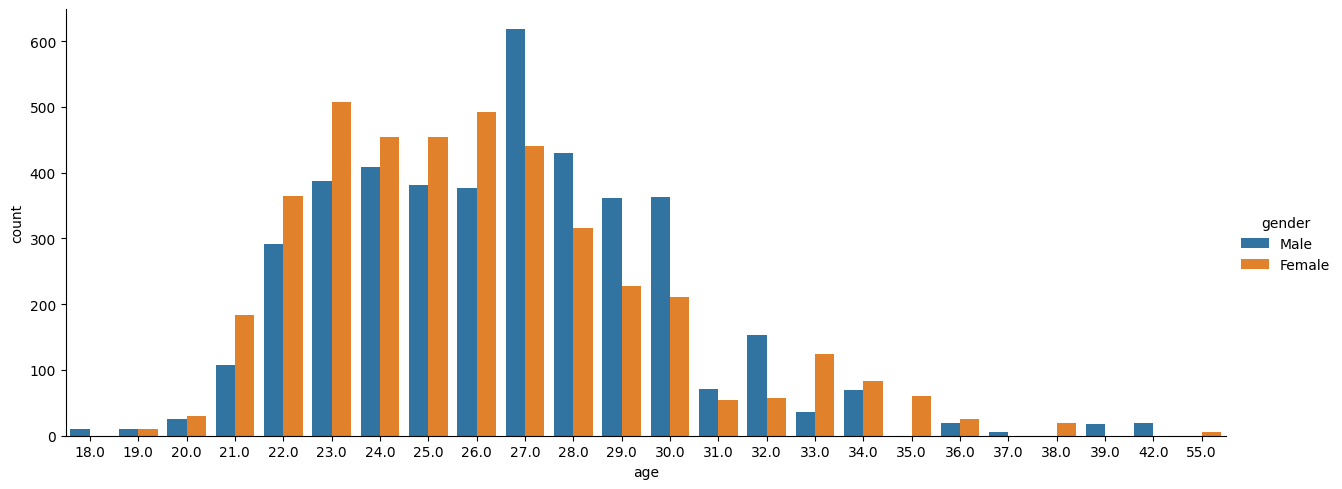

In [366]:
age_gender = df.groupby('age')['gender'].value_counts().reset_index()
age_gender['gender'] = age_gender['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')
sns.catplot(x="age", y="count", kind="bar", hue="gender", data=age_gender, aspect=2.5)

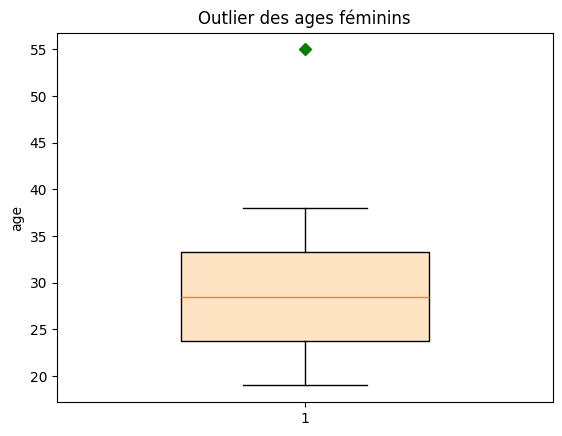

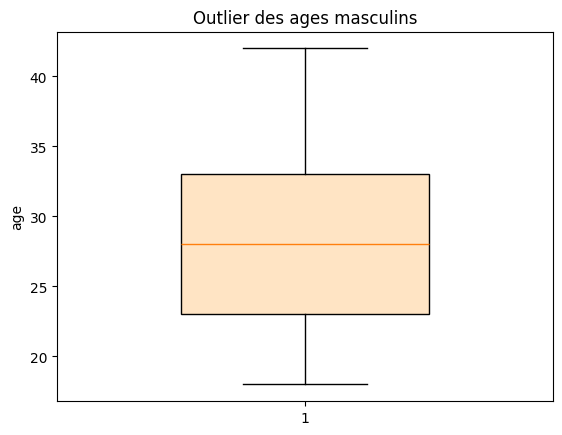

In [367]:
age_gender_female = age_gender.loc[age_gender['gender'] == 'Female']
fig1, ax1 = plt.subplots()
ax1.set_ylabel('age')
ax1.set_title('Outlier des ages féminins')
ax1.boxplot(age_gender_female['age'], 0, 'gD', patch_artist=True, boxprops={'facecolor': 'bisque'}, widths=0.5)
age_gender_male = age_gender.loc[age_gender['gender'] == 'Male']
fig2, ax2 = plt.subplots()
ax2.set_ylabel('age')
ax2.set_title('Outlier des ages masculins')
ax2.boxplot(age_gender_male['age'], 0, 'gD', patch_artist=True, boxprops={'facecolor': 'bisque'}, widths=0.5)
   
plt.show(fig1)
plt.show(fig2)

##### <font color="#3FFF33">Origines des participants</font>

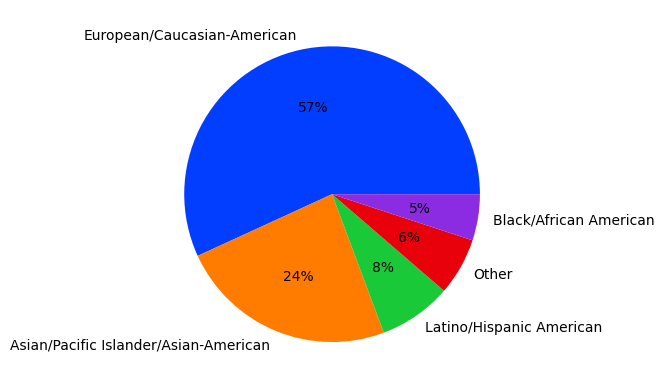

In [368]:
race = df.race.value_counts()
def Races(x):
    if x == 1.0:
        size = "Black/African American"
    elif x == 2.0:
        size = "European/Caucasian-American"
    elif x == 3.0:
        size = "Latino/Hispanic American"
    elif x == 4.0:
        size = "Asian/Pacific Islander/Asian-American"
    elif x == 5.0:
        size = "Native American"
    else:
        size = "Other"
    return size
race.index = race.index.map(Races)
colors = sns.color_palette("bright")
plt.pie(race, labels=race.index, colors=colors, autopct="%0.0f%%")
plt.show()

Nettoyage des données manquantes et abérantes du dataframe.

In [369]:
df_clean = df.dropna(subset=['from', 'goal'], how='all', inplace=True)
df_clean = df[(df["age"] < 37) & (df["age"] > 18)].reset_index()
df_clean.shape

(8189, 196)

16 personnes ont donc été supprimées de la base de données.

In [370]:
df = df_clean.copy()

#### <font color="VIOLET"><ins>Profil social</font>

##### <font color="#3FFF33">Domaine d'étude scolaire</font>

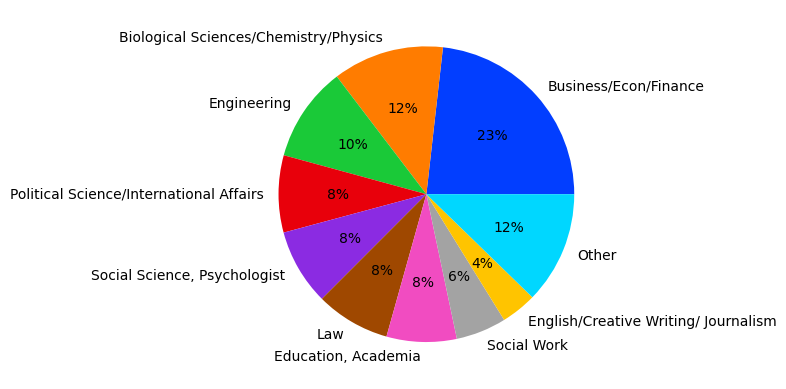

In [371]:
count = df.field_cd.value_counts().sort_values(ascending=False)
other = count[count<count.quantile(.50)].sum()
count['others'] = other
count = count[count>=count.quantile(.50)]
def student(x):
    if x == 1.0:
        size = "Law"
    elif x == 2.0:
        size = "Math"
    elif x == 3.0:
        size = "Social Science, Psychologist"
    elif x == 4.0:
        size = "Medical Science, Pharmaceuticals, and Bio Tech"
    elif x == 5.0:
        size = "Engineering"
    elif x == 6.0:
        size = "English/Creative Writing/ Journalism"
    elif x == 7.0:
        size = "History/Religion/Philosophy"
    elif x == 8.0:
        size = "Business/Econ/Finance"
    elif x == 9.0:
        size = "Education, Academia"
    elif x == 10.0:
        size = "Biological Sciences/Chemistry/Physics"
    elif x == 11.0:
        size = "Social Work"
    elif x == 12.0:
        size = "Undergrad/undecided"
    elif x == 13.0:
        size = "Political Science/International Affairs"
    elif x == 14.0:
        size = "Film"
    elif x == 15.0:
        size = "Fine Arts/Arts Administration"
    elif x == 16.0:
        size = "Languages"
    elif x == 17.0:
        size = "Architecture"
    else:
        size = "Other"
    return size

count.index = count.index.map(student)
colors = sns.color_palette("bright")
labels = count.index
plt.pie(count, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

##### <font color="#3FFF33">Domaine de l'emploi</font>

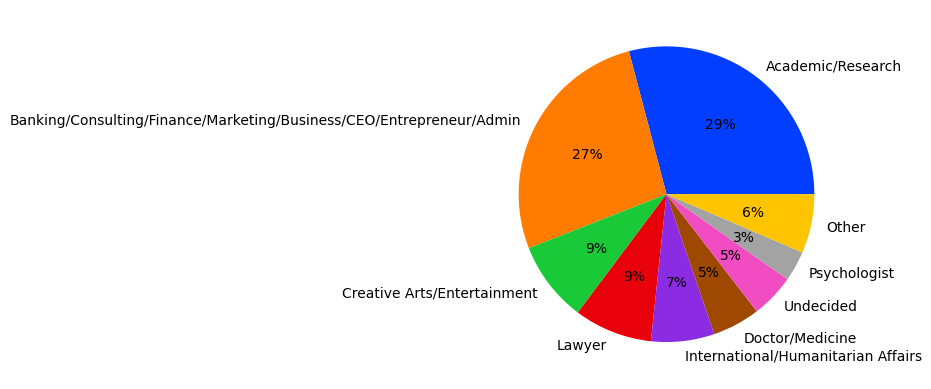

In [372]:
carriere = df.career_c.value_counts()
other2 = carriere[carriere<carriere.quantile(.50)].sum()
carriere['others'] = other2
carriere = carriere[carriere>=carriere.quantile(.50)]

def ProfilSociaux(x):
    if x == 1.0:
        size = "Lawyer"
    elif x == 2.0:
        size = "Academic/Research"
    elif x == 3.0:
        size = "Psychologist"
    elif x == 4.0:
        size = "Doctor/Medicine"
    elif x == 5.0:
        size = "Engineer"
    elif x == 6.0:
        size = "Creative Arts/Entertainment"
    elif x == 7.0:
        size = "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin"
    elif x == 8.0:
        size = "Real Estate"
    elif x == 9.0:
        size = "International/Humanitarian Affairs"
    elif x == 10.0:
        size = "Undecided"
    elif x == 11.0:
        size = "Social Work"
    elif x == 12.0:
        size = "Speech Pathology"
    elif x == 13.0:
        size = "Politics"
    elif x == 14.0:
        size = "Pro sports/Athletics"
    elif x == 15.0:
        size = "Other"
    elif x == 16.0:
        size = "Journalism"
    elif x == 17.0:
        size = "Architecture"
    else:
        size = "Other"
    return size

carriere.index = carriere.index.map(ProfilSociaux)
colors = sns.color_palette("bright")
labels = carriere.index
plt.pie(carriere, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

##### <font color="#3FFF33">Activités</font>

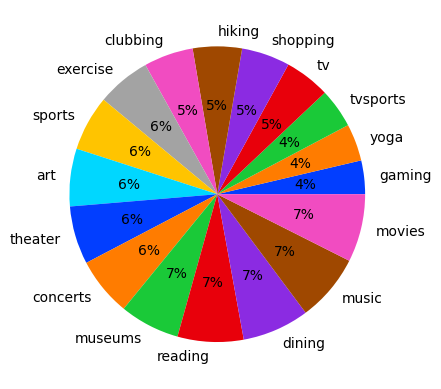

In [373]:
list_activites = df.loc[:, 'sports' : 'yoga']
list_activites = list_activites.sum().sort_values()
colors = sns.color_palette("bright")
labels = list_activites.index
plt.pie(list_activites, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

## <center><font color="tomato"><ins>**2 - ETUDE DES ATTENTES DES PARTICIPANTS**</ins></font></center>

#### <font color="VIOLET"><ins>Habitude de vie</font>

##### <font color="#3FFF33">Fréquence des rendez-vous</font>

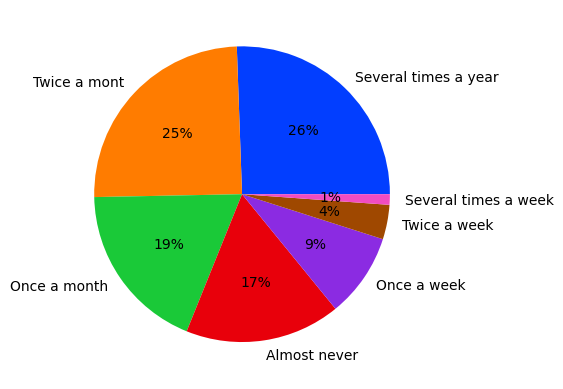

In [374]:
rdv = df.date.value_counts()

def Frequence(x):
    if x == 1.0:
        size = "Several times a week"
    elif x == 2.0:
        size = "Twice a week"
    elif x == 3.0:
        size = "Once a week"
    elif x == 4.0:
        size = "Twice a mont"
    elif x == 5.0:
        size = "Once a month"
    elif x == 6.0:
        size = "Several times a year"
    else:
        size = "Almost never"
    return size

rdv.index = rdv.index.map(Frequence)
colors = sns.color_palette("bright")
labels = rdv.index
colors = sns.color_palette("bright")
labels = rdv.index
plt.pie(rdv, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

##### <font color="#3FFF33">Fréquence de leurs sorties diverses</font>

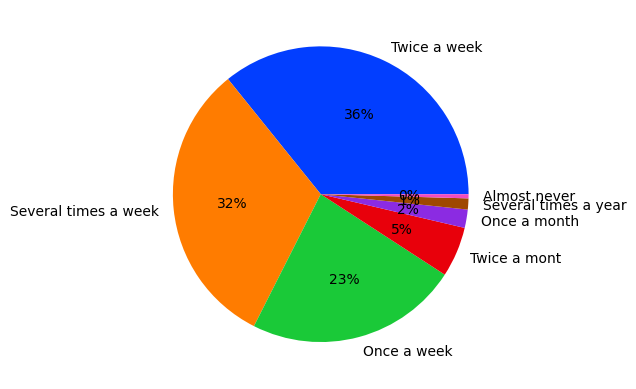

In [375]:
go_out = df.go_out.value_counts()

go_out.index = go_out.index.map(Frequence)
colors = sns.color_palette("bright")
labels = go_out.index
colors = sns.color_palette("bright")
labels = go_out.index
plt.pie(go_out, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

## <center><font color="tomato"><ins>**3 - OBJECTIFS DES PARTICIPANTS**</ins></font></center>

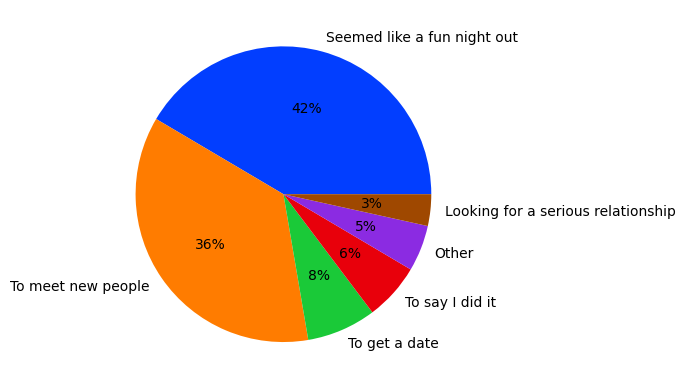

In [376]:
objectifs = df.goal.value_counts()

def Objects(x):
    if x == 1.0:
        size = "Seemed like a fun night out"
    elif x == 2.0:
        size = "To meet new people"
    elif x == 3.0:
        size = "To get a date"
    elif x == 4.0:
        size = "Looking for a serious relationship"
    elif x == 5.0:
        size = "To say I did it"
    else:
        size = "Other"
    return size

objectifs.index = objectifs.index.map(Objects)
colors = sns.color_palette("bright")
labels = objectifs.index
objectifs
colors = sns.color_palette("bright")
labels = objectifs.index
plt.pie(objectifs, labels=labels, colors=colors, autopct="%0.0f%%")
plt.show()

Une grande partie des participants cherchent, avant tout, à passer une agréable soirée.

In [391]:
df['attr1_1'].isnull().sum()

0

In [393]:
df['attr1_1'].value_counts()

attr1_1
20.00    1649
15.00     849
25.00     815
10.00     807
30.00     679
         ... 
20.45      10
90.00       9
2.00        9
20.83       5
12.77       5
Name: count, Length: 92, dtype: int64

In [532]:
wave1a5_10a21 = df[(df['wave'] <= 5) | (df['wave'] >=10)]
list_search_wave1a5_10a21 = wave1a5_10a21.groupby('gender').aggregate({'attr1_1':'mean','shar1_1':'mean','sinc1_1':'mean','intel1_1':'mean','fun1_1':'mean','amb1_1':'mean'}).reset_index(drop=True)

list_search_wave1a5_10a21

,attr1_1,shar1_1,sinc1_1,intel1_1,fun1_1,amb1_1
0,18.791329,12.177735,18.419101,21.581699,17.021160,12.056896
1,28.955732,10.287677,16.220268,19.586510,17.675988,7.546595


In [533]:
wave6a9 = df[(df['wave'] > 5) & (df['wave'] < 10)]
list_search_wave6a9 = wave6a9.groupby('gender').aggregate({'attr1_1':'mean','shar1_1':'mean','sinc1_1':'mean','intel1_1':'mean','fun1_1':'mean','amb1_1':'mean'}).reset_index(drop=True)
list_search_wave6a9

,attr1_1,shar1_1,sinc1_1,intel1_1,fun1_1,amb1_1
0,14.888956,14.590644,17.993930,18.559987,17.594987,16.372964
1,17.241667,14.507130,17.494603,19.307288,18.058624,13.392844


In [534]:
wave = (list_search_wave6a9*10 + list_search_wave1a5_10a21) / 2
wave

,attr1_1,shar1_1,sinc1_1,intel1_1,fun1_1,amb1_1
0,83.840446,79.042089,99.179202,103.590785,96.485516,87.893267
1,100.686199,77.679487,95.583150,106.329697,99.131116,70.737517


In [535]:
def quality(x):
    if x == 'attr1_1':
        size = "Attractive"
    elif x == 'sinc1_1':
        size = "Sincere"
    elif x == 'intel1_1':
        size = "Intelligent"
    elif x == 'fun1_1':
        size = "Fun"
    elif x == 'amb1_1':
        size = "Ambitious"
    else:
        size = "Has shared interests/hobbies"
    return size
wave.columns = wave.columns.map(quality)
wave

,Attractive,Has shared interests/hobbies,Sincere,Intelligent,Fun,Ambitious
0,83.840446,79.042089,99.179202,103.590785,96.485516,87.893267
1,100.686199,77.679487,95.583150,106.329697,99.131116,70.737517


In [536]:
import plotly.express as px
fig = px.histogram(wave, x=0, nbins=30, title="Histogram of Wave Data", labels={'0': 'Value'})
fig.show()



ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Attractive', 'Has shared interests/hobbies', 'Sincere', 'Intelligent', 'Fun', 'Ambitious'] but received: 0

In [531]:

wave2 = wave.transpose().sort_index(axis=1, ascending=True)
wave2

,Ambitious,Attractive,Fun,Has shared interests/hobbies,Intelligent,Sincere
0,87.893267,83.840446,96.485516,79.042089,103.590785,99.179202
1,70.737517,100.686199,99.131116,77.679487,106.329697,95.583150


In [522]:
import plotly.express as px
px.histogram(wave, x=wave.index, y=0, color=wave.index)

In [523]:
px.histogram(wave, x=wave.index, y=1, color=wave.index)

In [537]:
fig = px.histogram(wave2, x=0, nbins=40, title="Distribution de wave2", 
                   labels={'0': 'Valeurs'}, color_discrete_sequence=['blue'])
fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Ambitious', 'Attractive', 'Fun', 'Has shared interests/hobbies', 'Intelligent', 'Sincere'] but received: 0

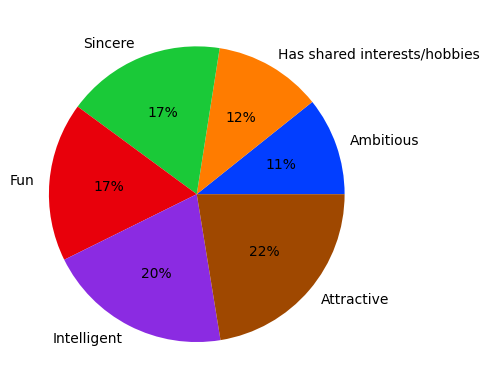

In [524]:
list_search = df.loc[:, 'attr1_1' : 'shar1_1'].sum().sort_values()
def quality(x):
    if x == 'attr1_1':
        size = "Attractive"
    elif x == 'sinc1_1':
        size = "Sincere"
    elif x == 'intel1_1':
        size = "Intelligent"
    elif x == 'fun1_1':
        size = "Fun"
    elif x == 'amb1_1':
        size = "Ambitious"
    else:
        size = "Has shared interests/hobbies"
    return size
list_search.index = list_search.index.map(quality)

# gender.rename(index={0:'Female', 1:'Male'}, inplace=True)
colors = sns.color_palette("bright")
plt.pie(list_search, labels=list_search.index, colors=colors, autopct="%0.0f%%")
plt.show()

In [525]:

list_search2 = df.loc[:, 'attr1_1' : 'shar1_1'].sum().sort_values(ascending=False).reset_index(name='count')
list_search2['index'] = list_search2['index'].map(quality)
px.histogram(list_search2, x= 'count', y='index')

La principale qualité recherchée est l'attractivité, suivie de l'intelligence.

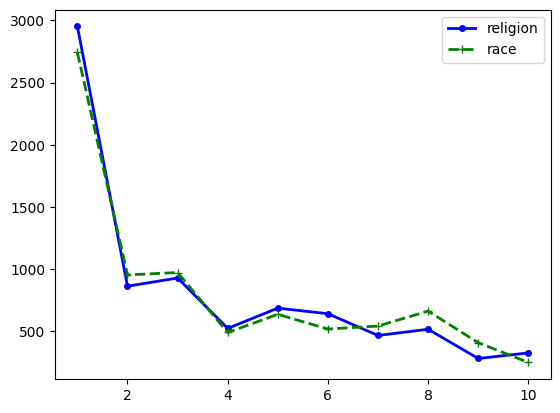

In [526]:
ethnic = df['imprace'].value_counts().reset_index(name='somme')
ethnic['iid'] = ethnic['imprace']
religious = df['imprelig'].value_counts().reset_index(name='total')
religious['iid'] = religious['imprelig']
dataset = religious.merge(ethnic, on='iid')
dataset = dataset.sort_values('iid')
plt.plot(
    'iid', 'total', data=dataset,
    marker='o', # marker type
    markerfacecolor='blue', # color of marker
    markersize=4, # size of marker
    color='blue', # color of line
    linewidth=2, # change width of line
    label="religion" # label for legend
)

plt.plot(
    'iid', 'somme', data=dataset,
    marker='+', # no marker
    color='green', # color of line
    linewidth=2, # change width of line
    linestyle='dashed', # change type of line
    label="race" # label for legend
)

# show legend
plt.legend()

# show graph
plt.show()

Une grande majorité des participants n'attachent pas une grande importance à l'éthique et la religion.